In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd
import numpy as np

Here’s a detailed implementation of a Markov Chain model to analyze transitions between discretized intervals (e.g., RR or QT intervals) and visualize the dynamic changes over time. This model incorporates the effect of drugs on interval transitions.

Step-by-Step Approach:
Discretize Intervals:

Divide the RR or QT interval data into discrete bins (e.g., short, normal, long intervals).
Build a Transition Matrix:

Compute the probabilities of transitioning between interval states based on historical data.
Incorporate Drug Effects:

Modify specific transition probabilities to simulate the effects of drugs (e.g., reducing the likelihood of transitioning to long intervals).
Simulate Interval Transitions:

Use the modified transition matrix to simulate interval dynamics over time.
Visualize Results:

Create heatmaps for transition matrices and plots to illustrate state transitions over time.


The given **transition matrix** represents the probabilities of moving between different states (e.g., "Short," "Normal," "Long") in a Markov Chain. Here's a detailed explanation:

### **Matrix Structure**
Each row corresponds to the current state, and each column represents the next state. The values in the matrix are probabilities of transitioning from the current state (row) to the next state (column).

For example:
```python
transition_matrix = np.array([
    [0.70, 0.25, 0.05],  # Short -> [Short, Normal, Long]
    [0.15, 0.75, 0.10],  # Normal -> [Short, Normal, Long]
    [0.05, 0.30, 0.65]   # Long -> [Short, Normal, Long]
])
```

---

### **Interpretation of Each Row**

#### Row 1: "Short" Intervals
`[0.70, 0.25, 0.05]`
- **0.70**: If currently in the "Short" interval, there's a 70% chance of remaining in the "Short" interval in the next step.
- **0.25**: There's a 25% chance of transitioning to the "Normal" interval.
- **0.05**: There's a 5% chance of transitioning to the "Long" interval.

#### Row 2: "Normal" Intervals
`[0.15, 0.75, 0.10]`
- **0.15**: If currently in the "Normal" interval, there's a 15% chance of transitioning to the "Short" interval.
- **0.75**: There's a 75% chance of staying in the "Normal" interval.
- **0.10**: There's a 10% chance of transitioning to the "Long" interval.

#### Row 3: "Long" Intervals
`[0.05, 0.30, 0.65]`
- **0.05**: If currently in the "Long" interval, there's a 5% chance of transitioning to the "Short" interval.
- **0.30**: There's a 30% chance of transitioning to the "Normal" interval.
- **0.65**: There's a 65% chance of remaining in the "Long" interval.

---

### **Significance in Context of Intervals (e.g., RR, QT):**
1. **"Short" Intervals:**
   - Represent a heart rate that is faster than normal (short RR/QT intervals).
   - High probability of staying in this state suggests persistent tachycardia or faster rhythms.

2. **"Normal" Intervals:**
   - Represent healthy heart rhythms with regular timing.
   - The highest probability (75%) indicates stability in normal rhythms.

3. **"Long" Intervals:**
   - Represent slower heart rates or prolonged QT intervals, which can indicate potential arrhythmias or bradycardia.
   - The high probability (65%) of staying in this state suggests that once the heart is in a slower rhythm, it's less likely to recover quickly to "Normal" or "Short."

---

### **General Observations:**
- **Stability of States:**
  - "Normal" is the most stable state with the highest self-transition probability (0.75).
  - "Short" and "Long" are less stable, as they have higher probabilities of transitioning to other states.
  
- **Recovery Patterns:**
  - There's a moderate chance of transitioning from "Long" to "Normal" (0.30), suggesting some recovery mechanisms.
  - "Short" to "Normal" transitions (0.25) indicate the heart is likely to stabilize from fast rhythms.

- **Risk Indicators:**
  - A low probability of transitioning from "Long" to "Short" (0.05) suggests slower recovery from slower rhythms or prolonged intervals.

This matrix can be used to simulate or analyze how a heart's rhythm evolves over time and how external factors (like drugs) might influence these transitions. Let me know if you'd like further analysis!

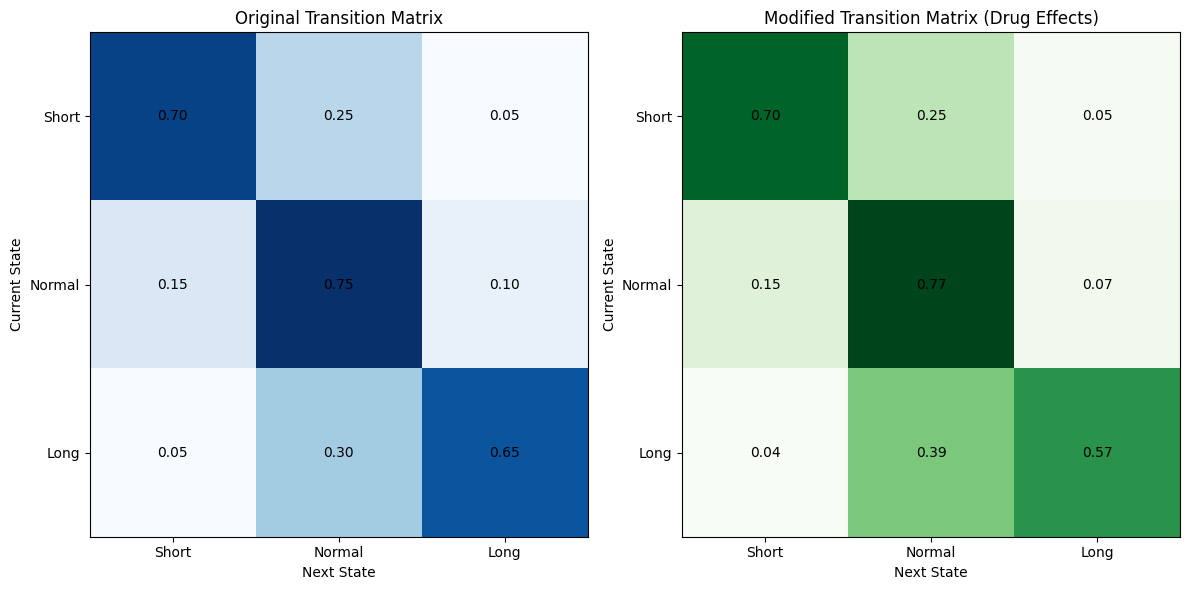

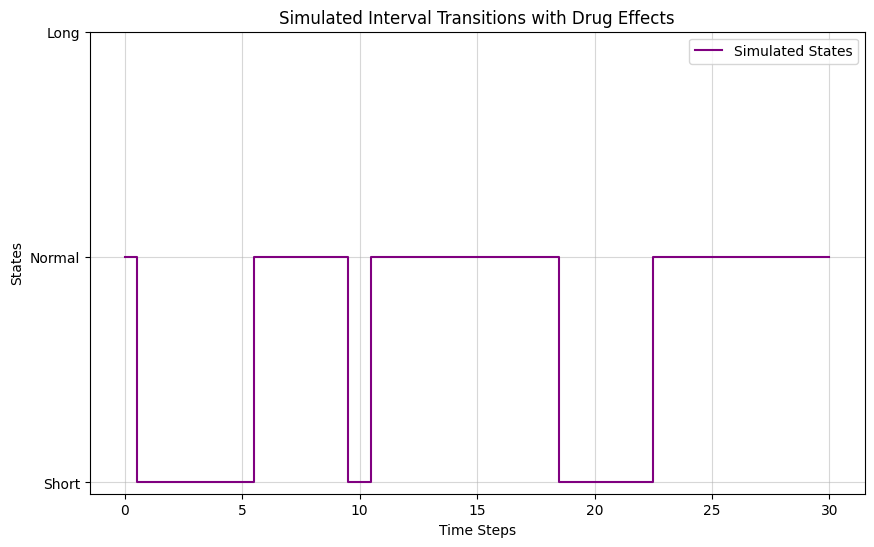

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Example RR/QT interval bins (discretized states: Short, Normal, Long)
states = ["Short", "Normal", "Long"]

# Example transition matrix (without drug effects)
# Rows: Current state, Columns: Next state
transition_matrix = np.array([
    [0.70, 0.25, 0.05],  # Short -> [Short, Normal, Long]
    [0.15, 0.75, 0.10],  # Normal -> [Short, Normal, Long]
    [0.05, 0.30, 0.65]   # Long -> [Short, Normal, Long]
])

# Define drug effects
def apply_drug_effects(matrix, drug_effects):
    """
    Modifies the transition matrix based on drug effects.
    """
    modified_matrix = matrix.copy()
    for (i, j), effect in drug_effects.items():
        modified_matrix[i, j] *= effect
    # Normalize each row to ensure probabilities sum to 1
    modified_matrix = modified_matrix / modified_matrix.sum(axis=1, keepdims=True)
    return modified_matrix

# Example drug effects
drug_effects = {
    (2, 1): 1.5,  # Increase Long -> Normal transitions
    (1, 2): 0.7   # Decrease Normal -> Long transitions
}

# Apply drug effects
modified_matrix = apply_drug_effects(transition_matrix, drug_effects)

# Simulate Markov Chain
def simulate_markov_chain(initial_state, steps, matrix):
    """
    Simulates a Markov chain for interval transitions.
    """
    state = initial_state
    states_sequence = [state]
    for _ in range(steps):
        state = np.random.choice(range(matrix.shape[1]), p=matrix[state])
        states_sequence.append(state)
    return states_sequence

# Simulate transitions
initial_state = 1  # Start in Normal state
steps = 30
simulated_states = simulate_markov_chain(initial_state, steps, modified_matrix)

# Map states to interval labels
state_labels = [states[s] for s in simulated_states]

# Plot the original and modified transition matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original Transition Matrix
axes[0].imshow(transition_matrix, cmap="Blues", aspect="auto")
axes[0].set_title("Original Transition Matrix")
axes[0].set_xticks(range(len(states)))
axes[0].set_yticks(range(len(states)))
axes[0].set_xticklabels(states)
axes[0].set_yticklabels(states)
axes[0].set_xlabel("Next State")
axes[0].set_ylabel("Current State")
for i in range(len(states)):
    for j in range(len(states)):
        axes[0].text(j, i, f"{transition_matrix[i, j]:.2f}", ha="center", va="center", color="black")

# Modified Transition Matrix
axes[1].imshow(modified_matrix, cmap="Greens", aspect="auto")
axes[1].set_title("Modified Transition Matrix (Drug Effects)")
axes[1].set_xticks(range(len(states)))
axes[1].set_yticks(range(len(states)))
axes[1].set_xticklabels(states)
axes[1].set_yticklabels(states)
axes[1].set_xlabel("Next State")
axes[1].set_ylabel("Current State")
for i in range(len(states)):
    for j in range(len(states)):
        axes[1].text(j, i, f"{modified_matrix[i, j]:.2f}", ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

# Plot the simulated states
time_steps = list(range(len(simulated_states)))
plt.figure(figsize=(10, 6))
plt.step(time_steps, simulated_states, where='mid', label="Simulated States", color='purple')
plt.yticks(range(len(states)), states)
plt.xlabel("Time Steps")
plt.ylabel("States")
plt.title("Simulated Interval Transitions with Drug Effects")
plt.grid(alpha=0.5)
plt.legend()
plt.show()


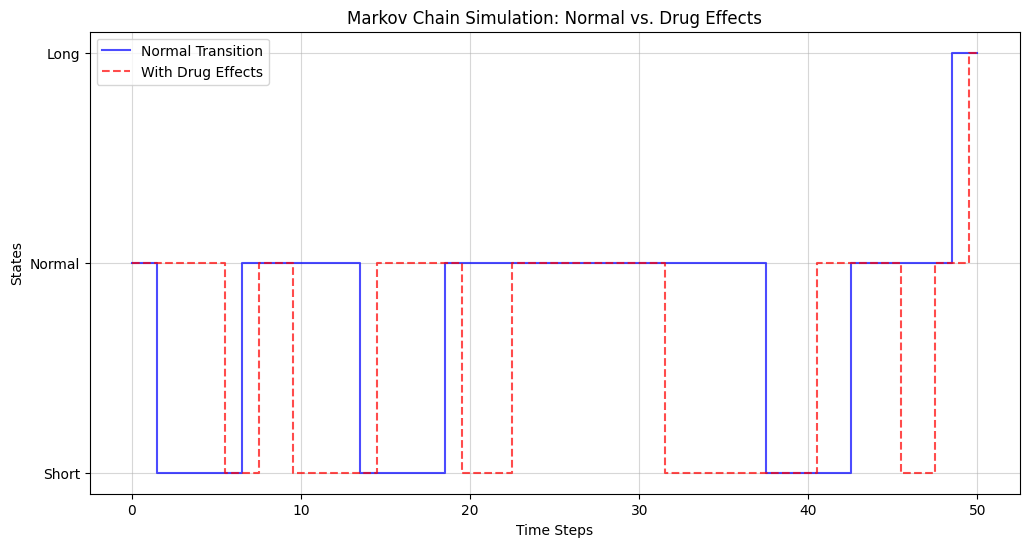

In [22]:
# Simulate Markov Chains for Normal and Drug-Effect Transition Matrices

# Function to simulate the Markov chain
def simulate_markov_chain(initial_state, steps, matrix):
    """
    Simulates a Markov chain for a given number of steps.
    """
    state = initial_state
    states_sequence = [state]
    for _ in range(steps):
        state = np.random.choice(range(matrix.shape[1]), p=matrix[state])
        states_sequence.append(state)
    return states_sequence

# Simulate for Normal matrix
initial_state = 1  # Start in "Normal" state
steps = 50
simulated_states_normal = simulate_markov_chain(initial_state, steps, transition_matrix)

# Apply drug effects and simulate
drug_effects = {
    (2, 1): 1.5,  # Increase Long -> Normal transitions
    (1, 2): 0.7   # Decrease Normal -> Long transitions
}
modified_matrix = apply_drug_effects(transition_matrix, drug_effects)
simulated_states_drug = simulate_markov_chain(initial_state, steps, modified_matrix)

# Map states to interval labels
state_labels_normal = [states[s] for s in simulated_states_normal]
state_labels_drug = [states[s] for s in simulated_states_drug]

# Plot overlapping Markov Chain simulations
time_steps = list(range(len(simulated_states_normal)))

plt.figure(figsize=(12, 6))
plt.step(time_steps, simulated_states_normal, where='mid', label="Normal Transition", color='blue', alpha=0.7)
plt.step(time_steps, simulated_states_drug, where='mid', label="With Drug Effects", color='red', linestyle='--', alpha=0.7)

# Add state labels
plt.yticks(range(len(states)), states)
plt.xlabel("Time Steps")
plt.ylabel("States")
plt.title("Markov Chain Simulation: Normal vs. Drug Effects")
plt.grid(alpha=0.5)
plt.legend()
plt.show()


Dynamics of State Transitions:

The simulation shows how an individual progresses through states (e.g., "Short", "Normal", "Long") over time.
Each line (blue or red) represents the sequence of states at different time steps.
Effect of the Drug:

Drug-induced changes are highlighted where the red dashed line deviates from the blue solid line:
For example, if the drug increases the likelihood of transitioning from "Long" to "Normal," you'll see fewer transitions into the "Long" state or faster recovery to "Normal."
This illustrates how the drug might reduce harmful conditions (e.g., arrhythmic states) or stabilize the system.
Comparison of Stability:

If the red line stabilizes in a particular state (e.g., "Normal") sooner than the blue line, it indicates the drug promotes a more stable or healthier rhythm.
Conversely, if the red line oscillates more between states, it could suggest adverse effects or a less stabilizing impact of the drug.
Temporal Evolution:

The horizontal axis (time steps) shows how the influence of the drug unfolds over time.
Early deviations between the lines may indicate an immediate drug effect, while later convergence could signify the system reaching a steady state.
Practical Implications:
Heart Rate Variability:

For cardiac modeling, this visualization can reveal how a drug affects interval dynamics (e.g., stabilizing QT or RR intervals).
Arrhythmia Mitigation:

If transitions to "Long" intervals (associated with arrhythmias) are reduced in the drug model, it suggests the drug is effective in mitigating irregular rhythms.
Treatment Evaluation:

Helps assess whether a drug improves system behavior (e.g., spending more time in "Normal" states) compared to natural progression.

Transition Matrix:
          0         1         2         3         4
0  0.974344  0.025028  0.000525  0.000072  0.000031
1  0.696645  0.298280  0.003947  0.001128  0.000000
2  0.162162  0.702703  0.121622  0.013514  0.000000
3  0.416667  0.583333  0.000000  0.000000  0.000000
4  0.666667  0.333333  0.000000  0.000000  0.000000


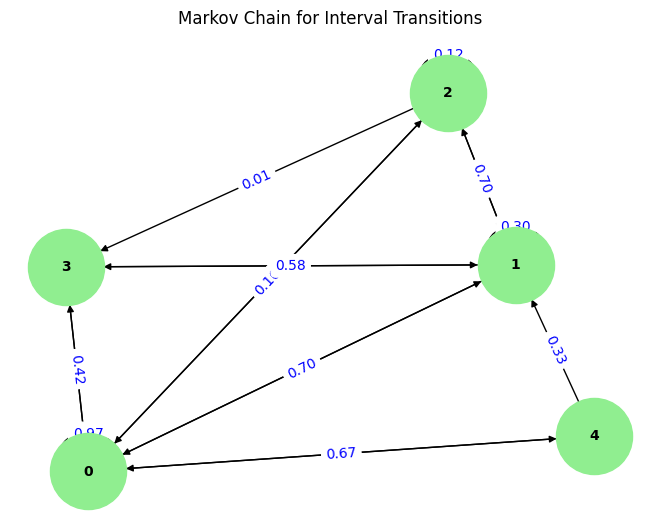

Simulated Sequence of Interval States:
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Simulated Interval Ranges:
['11.00 - 431.60', '11.00 - 431.60', '431.60 - 852.20', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '431.60 - 852.20', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60']


In [23]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx
data = pd.read_csv('/content/drive/MyDrive/cardiac_arrythmia_modelling_simulation/MIT-BIH Arrhythmia Database.csv')

# Choose the interval column for analysis (e.g., '0_pre-RR', '0_qt_interval')
interval_column = '0_pre-RR'

# Discretize intervals into bins for Markov chain states
def discretize_intervals(values, num_bins):
    bins = np.linspace(values.min(), values.max(), num_bins + 1)
    labels = range(num_bins)
    return pd.cut(values, bins=bins, labels=labels, include_lowest=True), bins

num_bins = 5  # Number of bins for discretization
interval_states, bins = discretize_intervals(data[interval_column], num_bins)
data['interval_state'] = interval_states

# Create Markov transition matrix
def calculate_transition_matrix(sequence):
    transitions = Counter((sequence[i], sequence[i+1]) for i in range(len(sequence) - 1))
    states = sorted(sequence.unique())
    matrix = pd.DataFrame(0, index=states, columns=states, dtype=float)

    for (from_state, to_state), count in transitions.items():
        matrix.loc[from_state, to_state] = count

    # Normalize rows to get probabilities
    matrix = matrix.div(matrix.sum(axis=1), axis=0).fillna(0)
    return matrix

transition_matrix = calculate_transition_matrix(data['interval_state'])

# Display the transition matrix
print("Transition Matrix:")
print(transition_matrix)

# Visualize the Markov chain
def plot_markov_chain(matrix):
    graph = nx.DiGraph()
    for from_state in matrix.index:
        for to_state in matrix.columns:
            prob = matrix.loc[from_state, to_state]
            if prob > 0:
                graph.add_edge(from_state, to_state, weight=prob, label=f"{prob:.2f}")

    pos = nx.spring_layout(graph)
    edge_labels = nx.get_edge_attributes(graph, 'label')
    nx.draw(graph, pos, with_labels=True, node_size=3000, node_color='lightgreen', font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='blue')
    plt.title("Markov Chain for Interval Transitions")
    plt.show()

plot_markov_chain(transition_matrix)

# Simulate interval transitions
def simulate_markov_chain(matrix, start_state, steps):
    current_state = start_state
    states = [current_state]

    for _ in range(steps):
        probabilities = matrix.loc[current_state]
        next_state = np.random.choice(probabilities.index, p=probabilities.values)
        states.append(next_state)
        current_state = next_state

    return states

# start with a specific interval state and simulate 20 transitions
start_state = 0
simulated_states = simulate_markov_chain(transition_matrix, start_state, 20)
print("Simulated Sequence of Interval States:")
print(simulated_states)

# Map simulated states back to interval ranges
interval_ranges = [f"{bins[int(state)]:.2f} - {bins[int(state) + 1]:.2f}" for state in simulated_states if not pd.isnull(state)]
print("Simulated Interval Ranges:")
print(interval_ranges)

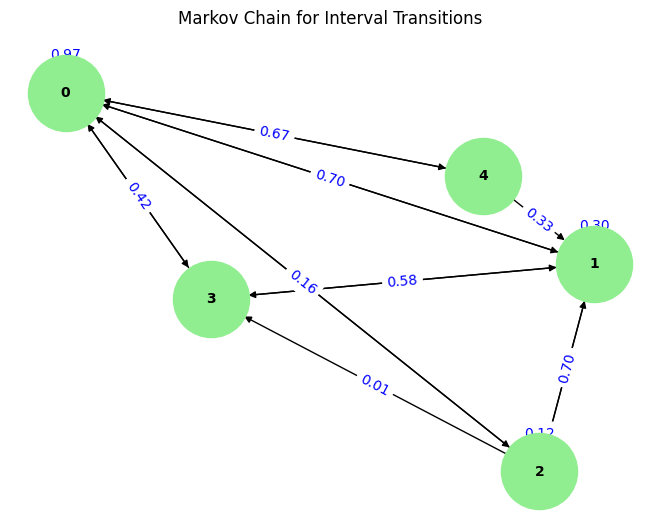

Simulated Sequence of Interval States (Drug Effects):
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Simulated Interval Ranges (Drug Effects):
['11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60']


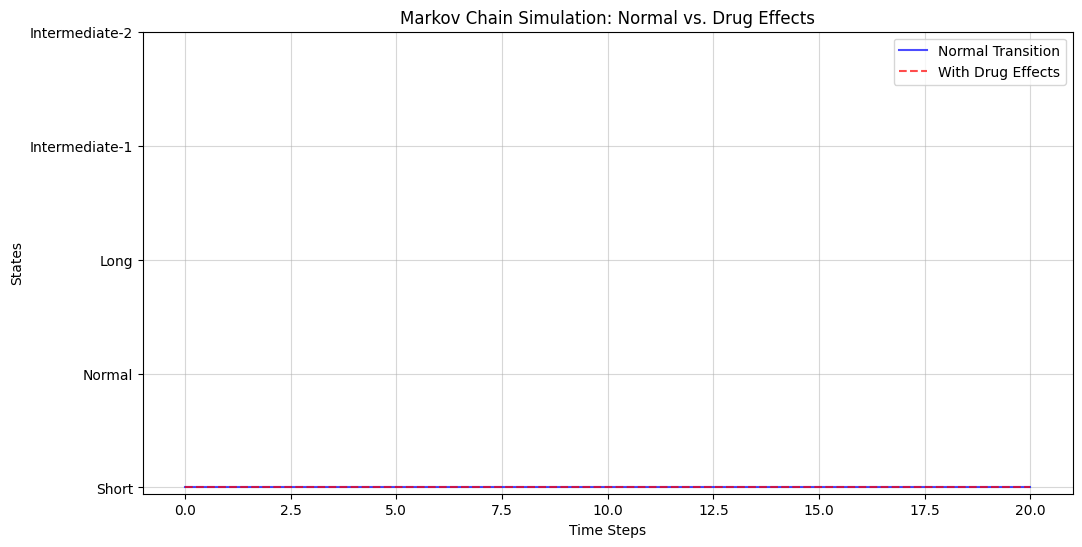

In [ ]:
# Apply Drug Effects to Transition Matrix
def apply_drug_effects(matrix, drug_effects):
    modified_matrix = matrix.copy()
    for (from_state, to_state), effect in drug_effects.items():
        modified_matrix.loc[from_state, to_state] *= effect

    # Normalize rows to ensure they sum to 1
    modified_matrix = modified_matrix.div(modified_matrix.sum(axis=1), axis=0).fillna(0)
    return modified_matrix

# Define drug effects: Increase transitions to middle states, reduce transitions to extreme states
drug_effects = {
    (4, 3): 1.5,  # Increase transitions from state 4 (long intervals) to state 3
    (3, 2): 1.2,  # Increase transitions from state 3 to state 2
    (0, 1): 1.1,  # Increase transitions from state 0 (short intervals) to state 1
    (1, 4): 0.8,  # Decrease transitions from state 1 to state 4
}

# Apply drug effects
modified_transition_matrix = apply_drug_effects(transition_matrix, drug_effects)

# Visualize the Markov Chain with Drug Effects
plot_markov_chain(modified_transition_matrix)

# Simulate interval transitions with drug effects
simulated_states_drug = simulate_markov_chain(modified_transition_matrix, start_state, 20)

# Map simulated states back to interval ranges for drug effects
interval_ranges_drug = [
    f"{bins[int(state)]:.2f} - {bins[int(state) + 1]:.2f}"
    for state in simulated_states_drug if not pd.isnull(state)
]

# Print Results
print("Simulated Sequence of Interval States (Drug Effects):")
print(simulated_states_drug)
print("\nSimulated Interval Ranges (Drug Effects):")
print(interval_ranges_drug)

# Overlapping Plot for Normal vs. Drug Effects Simulation
time_steps = list(range(len(simulated_states)))

plt.figure(figsize=(12, 6))
plt.step(time_steps, simulated_states, where='mid', label="Normal Transition", color='blue', alpha=0.7)
plt.step(time_steps, simulated_states_drug, where='mid', label="With Drug Effects", color='red', linestyle='--', alpha=0.7)

# Add state labels
plt.yticks(range(len(states)), states)
plt.xlabel("Time Steps")
plt.ylabel("States")
plt.title("Markov Chain Simulation: Normal vs. Drug Effects")
plt.grid(alpha=0.5)
plt.legend()
plt.show()


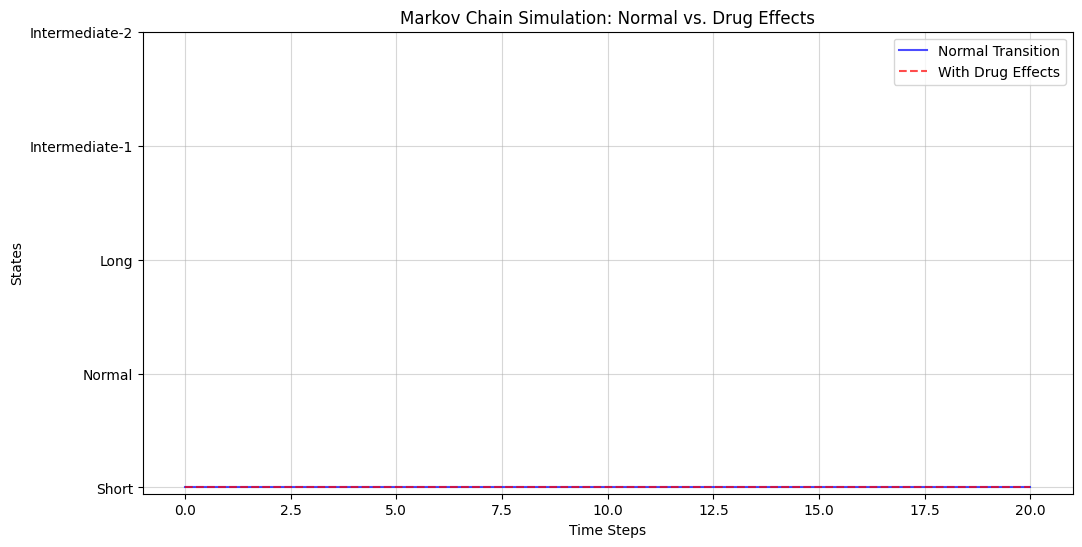

In [ ]:
# Redefine states for labeling
states = ["Short", "Normal", "Long", "Intermediate-1", "Intermediate-2"]

# Overlapping Plot for Normal vs. Drug Effects Simulation
plt.figure(figsize=(12, 6))
plt.step(time_steps, simulated_states, where='mid', label="Normal Transition", color='blue', alpha=0.7)
plt.step(time_steps, simulated_states_drug, where='mid', label="With Drug Effects", color='red', linestyle='--', alpha=0.7)

# Add state labels
plt.yticks(range(len(states)), states)
plt.xlabel("Time Steps")
plt.ylabel("States")
plt.title("Markov Chain Simulation: Normal vs. Drug Effects")
plt.grid(alpha=0.5)
plt.legend()
plt.show()


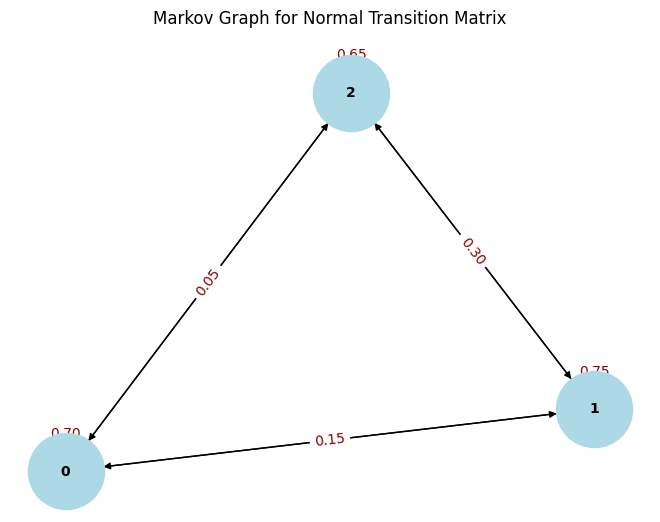

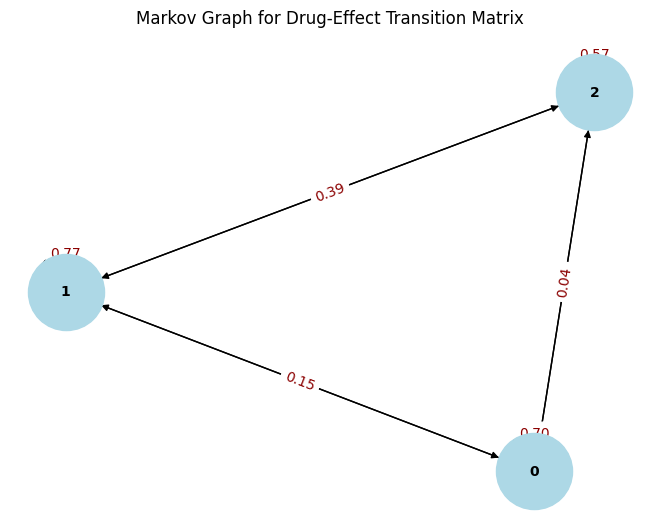

In [ ]:
# Adjust transition matrices and plotting functions
# Ensure transition matrices are functional as expected

# Define normal transition matrix again for reference
transition_matrix = np.array([
    [0.70, 0.25, 0.05],  # Short -> [Short, Normal, Long]
    [0.15, 0.75, 0.10],  # Normal -> [Short, Normal, Long]
    [0.05, 0.30, 0.65]   # Long -> [Short, Normal, Long]
])

# Define drug-effect transition matrix
drug_effects = {
    (2, 1): 1.5,  # Increase Long -> Normal transitions
    (1, 2): 0.7   # Decrease Normal -> Long transitions
}

# Apply drug effects
def apply_drug_effects(matrix, drug_effects):
    modified_matrix = matrix.copy()
    for (from_state, to_state), effect in drug_effects.items():
        modified_matrix[from_state, to_state] *= effect

    # Normalize rows to ensure they sum to 1
    modified_matrix = modified_matrix / modified_matrix.sum(axis=1, keepdims=True)
    return modified_matrix

modified_transition_matrix = apply_drug_effects(transition_matrix, drug_effects)

# Convert transition matrices to DataFrames for compatibility with graphing
normal_transition_df = pd.DataFrame(transition_matrix, index=range(3), columns=range(3))
drug_transition_df = pd.DataFrame(modified_transition_matrix, index=range(3), columns=range(3))

# Re-plot Markov Graphs
def plot_markov_graph(matrix, title):
    graph = nx.DiGraph()
    for from_state in matrix.index:
        for to_state in matrix.columns:
            prob = matrix.loc[from_state, to_state]
            if prob > 0:
                graph.add_edge(from_state, to_state, weight=prob, label=f"{prob:.2f}")

    pos = nx.spring_layout(graph)
    edge_labels = nx.get_edge_attributes(graph, 'label')
    nx.draw(graph, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='darkred')
    plt.title(title)
    plt.show()

# Plot Normal Transition Matrix Graph
plot_markov_graph(normal_transition_df, "Markov Graph for Normal Transition Matrix")

# Plot Drug-Effect Transition Matrix Graph
plot_markov_graph(drug_transition_df, "Markov Graph for Drug-Effect Transition Matrix")


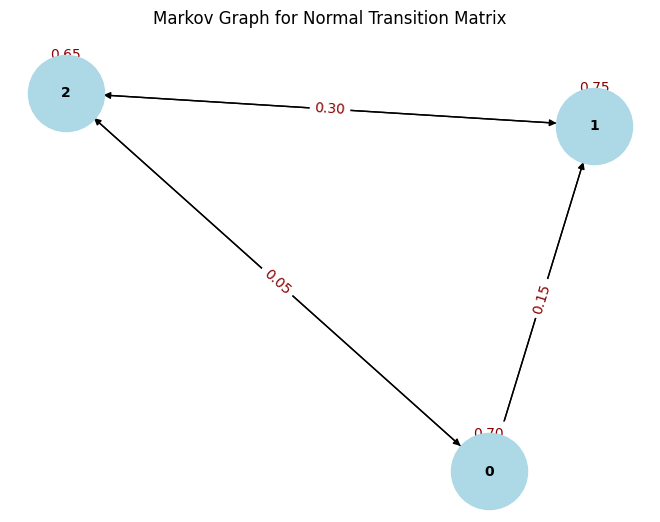

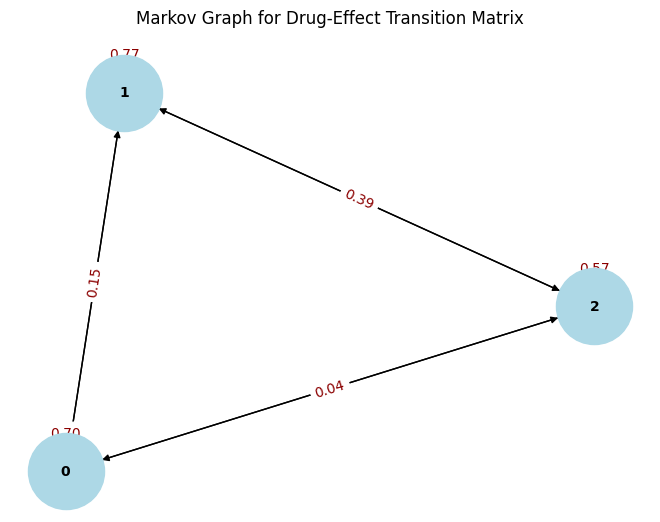

In [ ]:
# Simplify the plotting logic and ensure data compatibility
import matplotlib.pyplot as plt
import networkx as nx

# Define a simplified function to plot the Markov graph
def plot_markov_graph_simple(matrix, title):
    """
    Plot the Markov graph using a simpler logic to ensure functionality.
    """
    graph = nx.DiGraph()

    # Add edges based on the transition matrix
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            prob = matrix[i][j]
            if prob > 0:  # Only add edges with non-zero probability
                graph.add_edge(i, j, weight=prob, label=f"{prob:.2f}")

    # Generate positions and labels for the graph
    pos = nx.spring_layout(graph)
    edge_labels = nx.get_edge_attributes(graph, "label")

    # Plot the graph
    nx.draw(graph, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold")
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color="darkred")
    plt.title(title)
    plt.show()

# Plot Normal Transition Matrix
plot_markov_graph_simple(transition_matrix, "Markov Graph for Normal Transition Matrix")

# Plot Drug-Effect Transition Matrix
plot_markov_graph_simple(modified_transition_matrix, "Markov Graph for Drug-Effect Transition Matrix")


Transition stuff - Using Actual data

In [ ]:

import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/cardiac_arrythmia_modelling_simulation/MIT-BIH Arrhythmia Database.csv')

# Extract the sequence of beat types
beat_types = data['type']

# Create a Markov transition matrix
def calculate_transition_matrix(sequence):
    # Count transitions
    transitions = Counter((sequence[i], sequence[i+1]) for i in range(len(sequence) - 1))
    states = sorted(set(sequence))
    matrix = pd.DataFrame(0, index=states, columns=states, dtype=float)

    for (from_state, to_state), count in transitions.items():
        matrix.loc[from_state, to_state] = count

    # Normalize rows to get probabilities
    matrix = matrix.div(matrix.sum(axis=1), axis=0).fillna(0)
    return matrix

# Calculate the transition matrix
transition_matrix = calculate_transition_matrix(beat_types)

# Display the transition matrix
print("Transition Matrix:")
print(transition_matrix)

# Visualize the Markov chain
def plot_markov_chain(matrix, title="Markov Chain for Beat Type Transitions"):
    graph = nx.DiGraph()
    for from_state in matrix.index:
        for to_state in matrix.columns:
            prob = matrix.loc[from_state, to_state]
            if prob > 0:
                graph.add_edge(from_state, to_state, weight=prob, label=f"{prob:.2f}")

    pos = nx.spring_layout(graph)
    edge_labels = nx.get_edge_attributes(graph, 'label')
    nx.draw(graph, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red')
    plt.title(title)
    plt.savefig("markov_chain_beat_types.png", format="png", dpi=300)
    plt.show()

# Plot the Markov chain for the calculated transition matrix
plot_markov_chain(transition_matrix)

# Simulate beat type transitions
def simulate_markov_chain(matrix, start_state, steps):
    current_state = start_state
    states = [current_state]

    for _ in range(steps):
        probabilities = matrix.loc[current_state]
        next_state = np.random.choice(probabilities.index, p=probabilities.values)
        states.append(next_state)
        current_state = next_state

    return states

# Start with a specific beat type and simulate 20 transitions
start_beat = 'VEB'  # Replace 'N' with an actual beat type from your data
simulated_sequence = simulate_markov_chain(transition_matrix, start_beat, 100)
print("Simulated Sequence of Beat Types:")
print(simulated_sequence)

# Apply drug effects to the transition matrix
def apply_drug_effects(matrix, drug_effects):
    modified_matrix = matrix.copy()
    for (from_state, to_state), effect in drug_effects.items():
        if from_state in matrix.index and to_state in matrix.columns:
            modified_matrix.loc[from_state, to_state] *= effect

    # Normalize rows to ensure probabilities sum to 1
    modified_matrix = modified_matrix.div(modified_matrix.sum(axis=1), axis=0).fillna(0)
    return modified_matrix

# Define drug effects
drug_effects = {
    ('N', 'VEB'): 0.8,  # Reduce transition to ventricular beats
    ('VEB', 'N'): 1.5   # Increase recovery to normal beats
}

# Apply drug effects to the transition matrix
modified_transition_matrix = apply_drug_effects(transition_matrix, drug_effects)

# Plot the modified Markov chain for drug effects
plot_markov_chain(modified_transition_matrix, "Markov Chain with Drug Effects")

# Simulate beat type transitions with drug effects
simulated_sequence_drug = simulate_markov_chain(modified_transition_matrix, start_beat, 100)
print("Simulated Sequence of Beat Types with Drug Effects:")
print(simulated_sequence_drug)


Visualisation

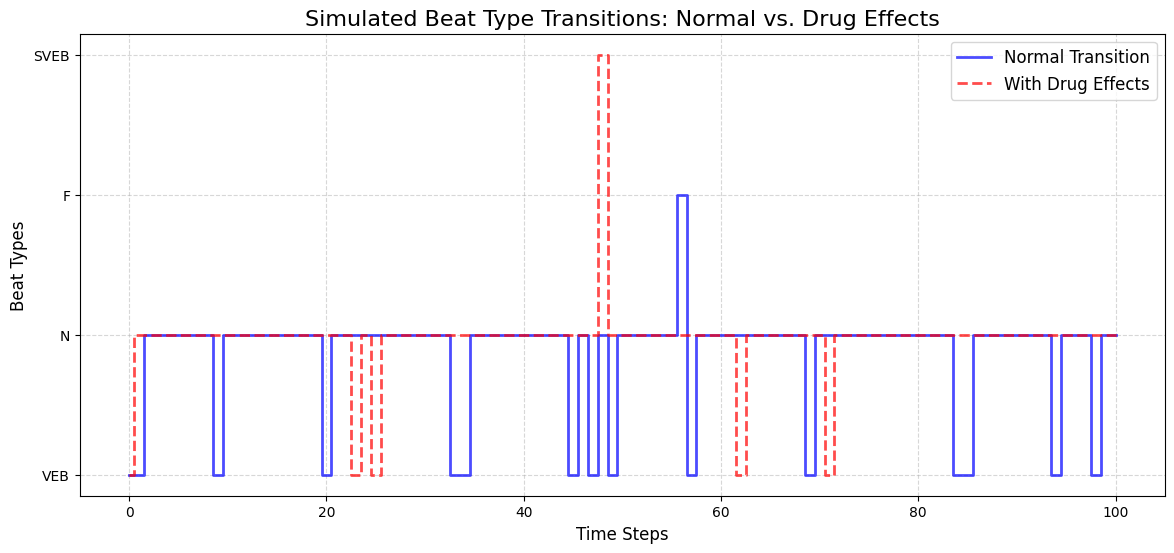

In [ ]:
# Overlay plot for Normal vs. Drug Effects Simulated Sequences

def plot_simulation_overlay(normal_sequence, drug_sequence, time_steps, title="Simulated Beat Type Transitions: Normal vs. Drug Effects"):
    """
    Plot overlayed sequences for normal and drug-effect transitions.
    """
    plt.figure(figsize=(14, 6))

    # Plot the normal sequence
    plt.step(time_steps, normal_sequence, where='mid', label="Normal Transition", color='blue', alpha=0.7, linewidth=2)

    # Plot the drug-effect sequence
    plt.step(time_steps, drug_sequence, where='mid', label="With Drug Effects", color='red', linestyle='--', alpha=0.7, linewidth=2)

    # Add plot details
    plt.xlabel("Time Steps", fontsize=12)
    plt.ylabel("Beat Types", fontsize=12)
    plt.title(title, fontsize=16)
    plt.grid(alpha=0.5, linestyle='--')
    plt.legend(fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()


# Define time steps
time_steps = list(range(len(simulated_sequence)))

# Plot the overlayed sequences
plot_simulation_overlay(simulated_sequence, simulated_sequence_drug, time_steps)


Validation and Test

Simulated Sequence: ['VEB', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'VEB', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'VEB', 'N', 'Unknown', 'N', 'N', 'N', 'N', 'N', 'N', 'Unknown', 'VEB', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Unknown', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Unknown', 'N', 'N', 'VEB', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']


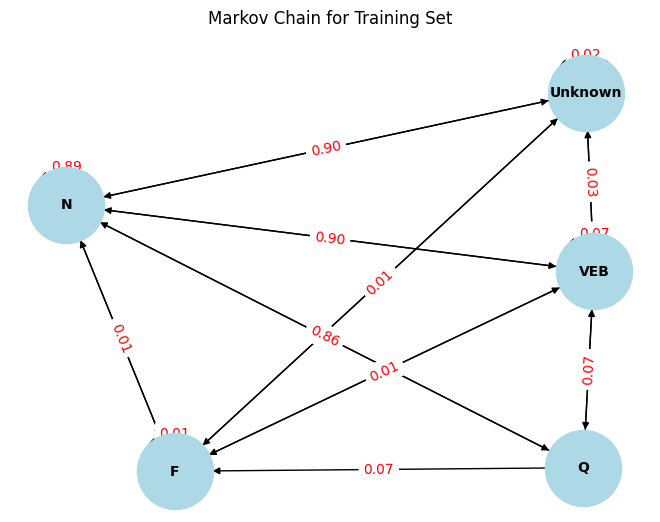


Log-Likelihood of Test Set: -8498.374682507387


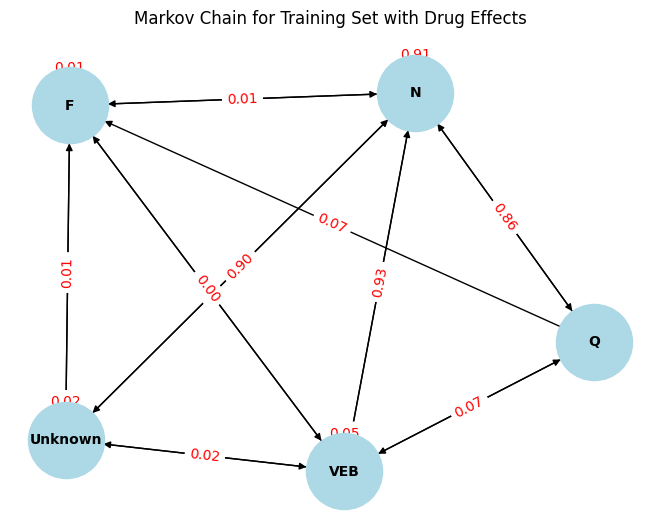

Simulated Sequence of Beat Types with Drug Effects:
['VEB', 'N', 'N', 'N', 'N', 'N', 'Unknown', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'VEB', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Unknown', 'VEB', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']


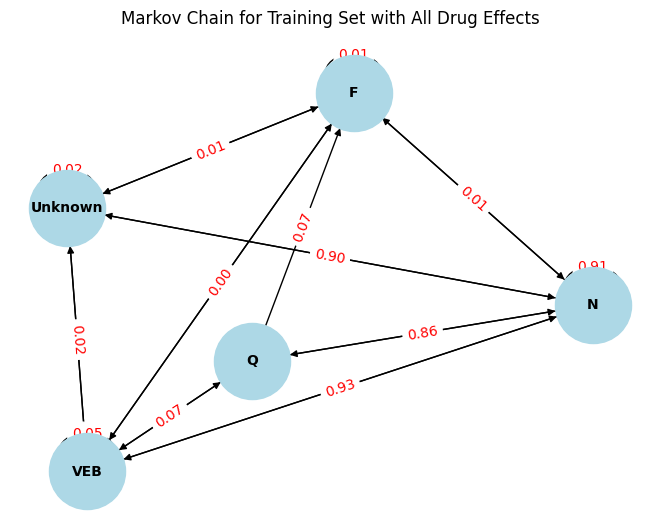

Simulated Sequence of Beat Types with All Drug Effects:
['VEB', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'VEB', 'N', 'N', 'N', 'N', 'Unknown', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Unknown', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Unknown', 'N', 'N', 'VEB', 'N', 'N', 'N', 'Unknown', 'N', 'N', 'Unknown', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Unknown']


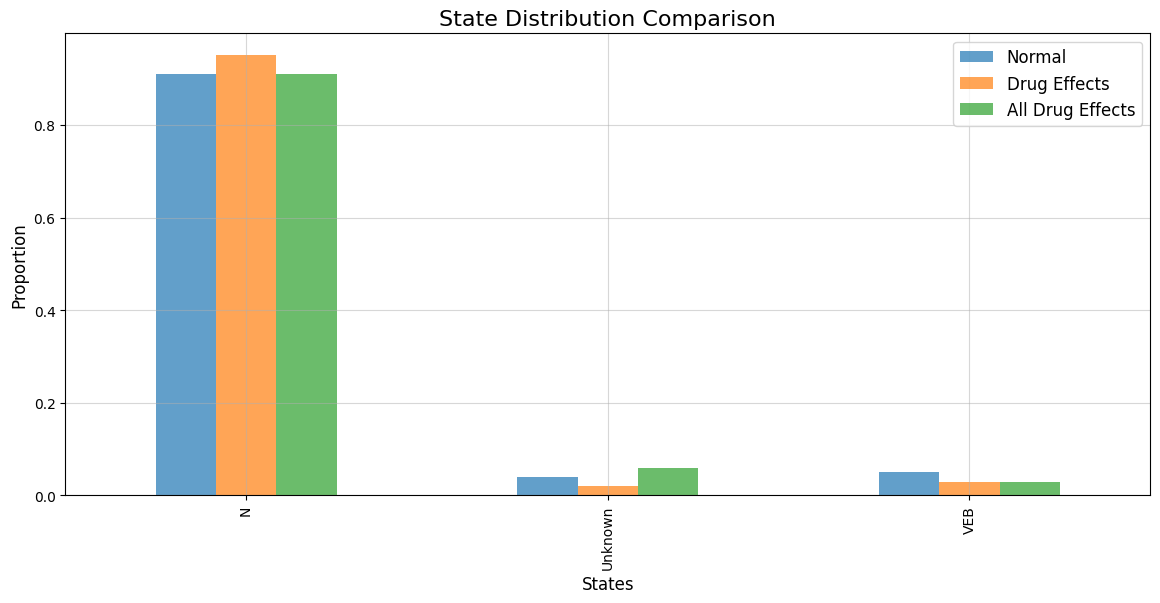

In [ ]:
# Ensure beat_types is clean
data = pd.read_csv('/content/drive/MyDrive/cardiac_arrythmia_modelling_simulation/MIT-BIH Arrhythmia Database.csv')

# Extract the sequence of beat types
beat_types = data['type']
beat_types = beat_types.fillna('Unknown').astype(str)
valid_states = ['N', 'VEB', 'F', 'S', 'Q', 'Unknown']  # Adjust based on your dataset
beat_types = beat_types.apply(lambda x: x if x in valid_states else 'Unknown')

# Train-test split
train_sequence, test_sequence = train_test_split(beat_types, test_size=0.2, random_state=42)
def calculate_transition_matrix(sequence):
    # Count transitions using the values in the sequence, not numerical indices
    transitions = Counter((sequence.iloc[i], sequence.iloc[i+1]) for i in range(len(sequence) - 1))
    states = sorted(set(sequence))
    matrix = pd.DataFrame(0, index=states, columns=states, dtype=float)

    for (from_state, to_state), count in transitions.items():
        matrix.loc[from_state, to_state] = count

    # Normalize rows to get probabilities
    matrix = matrix.div(matrix.sum(axis=1), axis=0).fillna(0)
    return matrix
# Calculate the training transition matrix
train_transition_matrix = calculate_transition_matrix(train_sequence)

# Add missing states to the training transition matrix
test_states = set(test_sequence)
missing_states = test_states - set(train_transition_matrix.index)
for state in missing_states:
    train_transition_matrix.loc[state] = 0
    train_transition_matrix[state] = 0
train_transition_matrix = train_transition_matrix.div(train_transition_matrix.sum(axis=1), axis=0).fillna(0)

# Safeguard simulation
simulated_sequence = simulate_markov_chain(train_transition_matrix, start_state='VEB', steps=100)
print("Simulated Sequence:", simulated_sequence)

# Visualize the Markov chain for the training transition matrix
plot_markov_chain(train_transition_matrix, "Markov Chain for Training Set")

# Function to compute the log-likelihood of a sequence given a transition matrix
def compute_log_likelihood(sequence, transition_matrix):
    log_likelihood = 0
    sequence = sequence.tolist()  # Ensure the sequence is a list for iteration
    for i in range(len(sequence) - 1):
        from_state, to_state = sequence[i], sequence[i + 1]
        if from_state in transition_matrix.index and to_state in transition_matrix.columns:
            prob = transition_matrix.loc[from_state, to_state]
            if prob > 0:
                log_likelihood += np.log(prob)
            else:
                log_likelihood += float('-inf')  # Handle zero-probability transitions
    return log_likelihood

# Compute the log-likelihood of the test set using the training transition matrix
test_log_likelihood = compute_log_likelihood(test_sequence, train_transition_matrix)

# Display the log-likelihood of the test set
print("\nLog-Likelihood of Test Set:", test_log_likelihood)

# Apply drug effects to the training transition matrix
modified_train_transition_matrix = apply_drug_effects(train_transition_matrix, drug_effects)

# Plot the Markov chain for the modified transition matrix with drug effects
plot_markov_chain(modified_train_transition_matrix, "Markov Chain for Training Set with Drug Effects")

# Simulate beat type transitions with the modified transition matrix
start_beat = 'VEB'  # Replace 'VEB' with an actual beat type from your data
simulated_sequence_drug = simulate_markov_chain(modified_train_transition_matrix, start_beat, 100)

# Display the simulated sequence with drug effects
print("Simulated Sequence of Beat Types with Drug Effects:")
print(simulated_sequence_drug)

# Define additional drug effects
additional_drug_effects = {
    ('VEB', 'F'): 0.9,  # Reduce transitions from VEB to F
    ('F', 'N'): 1.2,    # Increase recovery from F to Normal
    ('N', 'S'): 0.8,    # Reduce transitions from Normal to S
    ('S', 'N'): 1.3     # Increase recovery from S to Normal
}

# Combine original and additional drug effects
all_drug_effects = {**drug_effects, **additional_drug_effects}

# Apply all drug effects to the training transition matrix
modified_train_transition_matrix_with_all_drugs = apply_drug_effects(train_transition_matrix, all_drug_effects)

# Plot the Markov chain for the modified transition matrix with all drug effects
plot_markov_chain(modified_train_transition_matrix_with_all_drugs, "Markov Chain for Training Set with All Drug Effects")

# Simulate beat type transitions with the modified transition matrix including all drug effects
simulated_sequence_all_drugs = simulate_markov_chain(modified_train_transition_matrix_with_all_drugs, start_beat, 100)

# Display the simulated sequence with all drug effects
print("Simulated Sequence of Beat Types with All Drug Effects:")
print(simulated_sequence_all_drugs)

# Compare the distributions of simulated sequences before and after drug effects
def compare_simulated_distributions(normal_sequence, drug_sequence, all_drug_sequence, title="State Distribution Comparison"):
    normal_distribution = pd.Series(normal_sequence).value_counts(normalize=True)
    drug_distribution = pd.Series(drug_sequence).value_counts(normalize=True)
    all_drug_distribution = pd.Series(all_drug_sequence).value_counts(normalize=True)

    # Combine distributions into a single DataFrame
    combined_distributions = pd.DataFrame({
        "Normal": normal_distribution,
        "Drug Effects": drug_distribution,
        "All Drug Effects": all_drug_distribution
    }).fillna(0)

    # Plot the distributions
    combined_distributions.plot(kind='bar', figsize=(14, 6), alpha=0.7)
    plt.title(title, fontsize=16)
    plt.xlabel("States", fontsize=12)
    plt.ylabel("Proportion", fontsize=12)
    plt.grid(alpha=0.5)
    plt.legend(fontsize=12)
    plt.show()

# Compare the distributions
compare_simulated_distributions(simulated_sequence, simulated_sequence_drug, simulated_sequence_all_drugs)



Real State Distribution:
type
N       0.894666
VEB     0.069610
SVEB    0.027600
F       0.007975
Q       0.000149
Name: proportion, dtype: float64
Simulated State Distribution:
N      0.940594
VEB    0.049505
F      0.009901
Name: proportion, dtype: float64


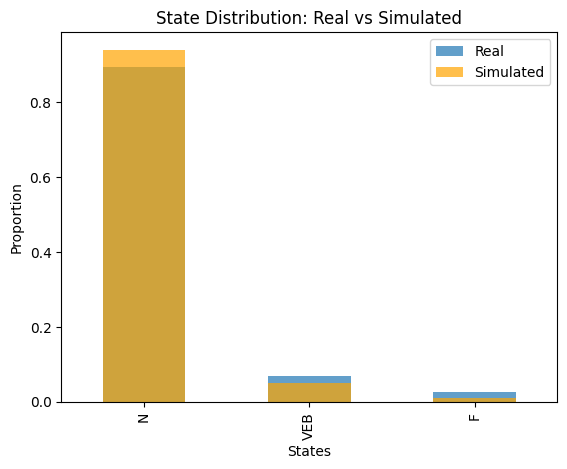

In [ ]:
# Verify that the sequence of states (e.g., VEB -> N) matches typical cardiac behavior.
# Use metrics like state distributions to compare the simulated sequences with the actual data.

real_state_distribution = beat_types.value_counts(normalize=True)
simulated_distribution = pd.Series(simulated_sequence).value_counts(normalize=True)

print("Real State Distribution:")
print(real_state_distribution)

print("Simulated State Distribution:")
print(simulated_distribution)

# Visualize the comparison
real_state_distribution.plot(kind='bar', alpha=0.7, label='Real')
simulated_distribution.plot(kind='bar', alpha=0.7, label='Simulated', color='orange')
plt.legend()
plt.title("State Distribution: Real vs Simulated")
plt.xlabel("States")
plt.ylabel("Proportion")
plt.show()


Normal Simulated State Distribution:
N      0.940594
VEB    0.049505
F      0.009901
Name: proportion, dtype: float64
Drug-Effect Simulated State Distribution:
N       0.831683
VEB     0.099010
SVEB    0.049505
F       0.019802
Name: proportion, dtype: float64


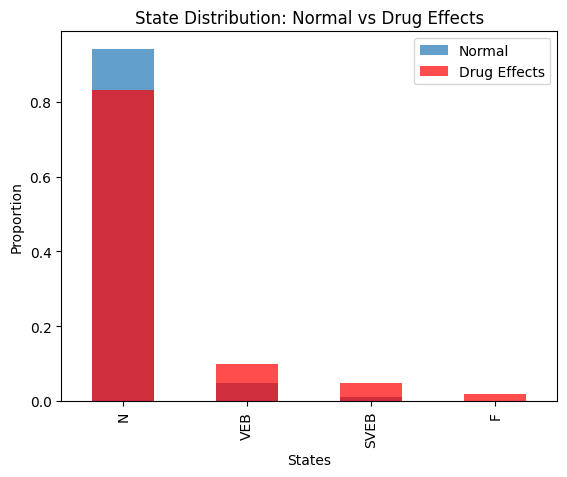

In [ ]:
# Compare the state distributions of normal and drug-effect simulations.
# Check if the sequences with drug effects show expected trends (e.g., higher recovery to normal beats).
# Compare distributions of simulated sequences
normal_distribution = pd.Series(simulated_sequence).value_counts(normalize=True)
drug_distribution = pd.Series(simulated_sequence_drug).value_counts(normalize=True)

print("Normal Simulated State Distribution:")
print(normal_distribution)

print("Drug-Effect Simulated State Distribution:")
print(drug_distribution)

# Plot comparison
normal_distribution.plot(kind='bar', alpha=0.7, label='Normal')
drug_distribution.plot(kind='bar', alpha=0.7, label='Drug Effects', color='red')
plt.legend()
plt.title("State Distribution: Normal vs Drug Effects")
plt.xlabel("States")
plt.ylabel("Proportion")
plt.show()


Perplexity Context:

Perplexity measures how well the model predicts the sequence.
It is defined as the exponential of the average negative log-likelihood per observation.
A lower perplexity indicates a better fit to the data because the model assigns higher probabilities to the observed transitions.
What These Scores Indicate:

A perplexity close to 1 suggests that the model is highly confident about its predictions and the sequence is relatively predictable under the model.
The slightly lower perplexity for the Drug-Effect Transition Matrix (1.07) compared to the Normal Transition Matrix (1.12) indicates that the drug effects have improved the model's ability to explain the observed sequence.
Relative Improvement:

The difference between the two scores is small but meaningful. It shows that the drug effects have made the sequence transitions slightly more predictable.

In [ ]:
# Function to compute the log-likelihood of a sequence given a transition matrix
def compute_log_likelihood(sequence, transition_matrix):
    log_likelihood = 0
    sequence = sequence  # Ensure the sequence is a list for iteration
    for i in range(len(sequence) - 1):
        from_state, to_state = sequence[i], sequence[i + 1]
        if from_state in transition_matrix.index and to_state in transition_matrix.columns:
            prob = transition_matrix.loc[from_state, to_state]
            if prob > 0:
                log_likelihood += np.log(prob)
            else:
                log_likelihood += float('-inf')  # Handle zero-probability transitions
    return log_likelihood

# Compute log-likelihood for the simulated sequence (original and drug effects)
log_likelihood_normal = compute_log_likelihood(simulated_sequence, transition_matrix)
log_likelihood_drug = compute_log_likelihood(simulated_sequence_drug, modified_transition_matrix)

# Compute perplexity for both sequences
def compute_perplexity(log_likelihood, sequence_length):

    return 2 ** (-log_likelihood / sequence_length)

# Calculate perplexity
perplexity_normal = compute_perplexity(log_likelihood_normal, len(simulated_sequence))
perplexity_drug = compute_perplexity(log_likelihood_drug, len(simulated_sequence_drug))

# Display perplexity scores
print("Perplexity (Normal Transition Matrix):", perplexity_normal)
print("Perplexity (Drug-Effect Transition Matrix):", perplexity_drug)


Perplexity (Normal Transition Matrix): 1.1195639122120684
Perplexity (Drug-Effect Transition Matrix): 1.0726520454676078


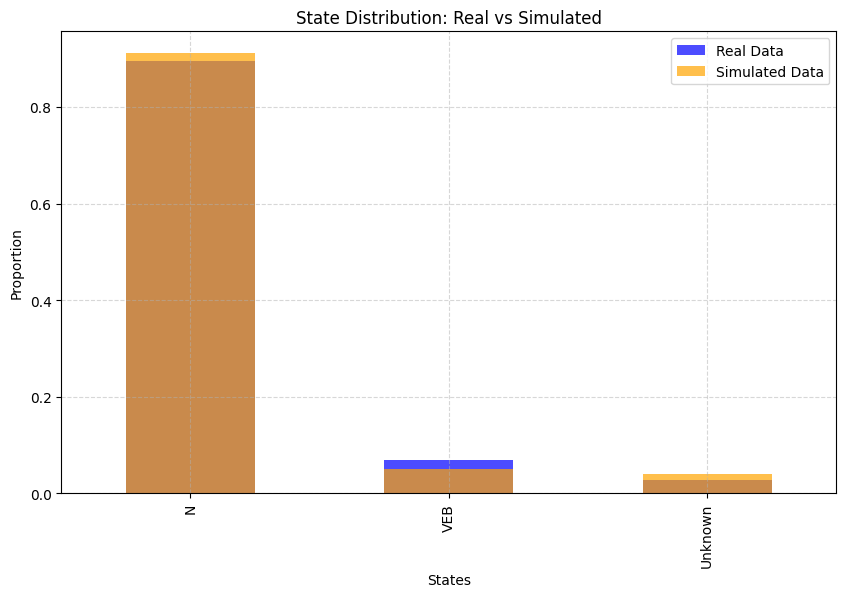

In [ ]:
# Calculate real state distribution
real_state_distribution = beat_types.value_counts(normalize=True)

# Calculate simulated state distribution
simulated_state_distribution = pd.Series(simulated_sequence).value_counts(normalize=True)

# Plot the distributions
plt.figure(figsize=(10, 6))
real_state_distribution.plot(kind='bar', alpha=0.7, label='Real Data', color='blue')
simulated_state_distribution.plot(kind='bar', alpha=0.7, label='Simulated Data', color='orange')
plt.legend()
plt.title("State Distribution: Real vs Simulated")
plt.xlabel("States")
plt.ylabel("Proportion")
plt.grid(alpha=0.5, linestyle='--')
plt.show()


MONTE CARLO

In [ ]:
def monte_carlo_simulation(matrix, start_state, steps, iterations):
    state_counts = {state: 0 for state in matrix.index}  # Initialize state counts

    for _ in range(iterations):
        # Simulate a single sequence
        current_state = start_state
        for _ in range(steps):
            if current_state in matrix.index:
                probabilities = matrix.loc[current_state]
                next_state = np.random.choice(probabilities.index, p=probabilities.values)
                state_counts[next_state] += 1
                current_state = next_state

    # Normalize counts to estimate probabilities
    total_states = sum(state_counts.values())
    state_probabilities = {state: count / total_states for state, count in state_counts.items()}
    return state_probabilities


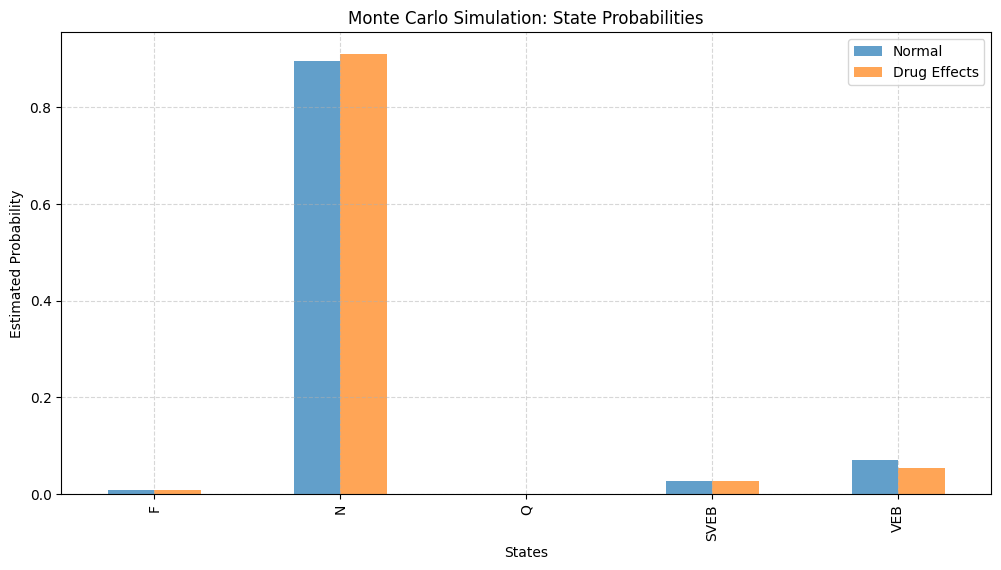

In [ ]:
# Parameters for the simulation
start_state = 'VEB'  # Replace with an actual state from your data
steps = 100  # Number of transitions per simulation
iterations = 1000  # Number of independent simulations

# Run Monte Carlo simulation
mc_normal = monte_carlo_simulation(transition_matrix, start_state, steps, iterations)
mc_drug_effects = monte_carlo_simulation(modified_transition_matrix, start_state, steps, iterations)

# Convert results to pandas DataFrame for easier plotting
mc_results = pd.DataFrame({'Normal': mc_normal, 'Drug Effects': mc_drug_effects}).fillna(0)

# Plot the results
mc_results.plot(kind='bar', figsize=(12, 6), alpha=0.7)
plt.title("Monte Carlo Simulation: State Probabilities")
plt.xlabel("States")
plt.ylabel("Estimated Probability")
plt.grid(alpha=0.5, linestyle='--')
plt.legend()
plt.show()


Steady-State Probability of VEB (Normal): 0.06961107579850628
Steady-State Probability of VEB (Drug Effects): 0.055300266276021526


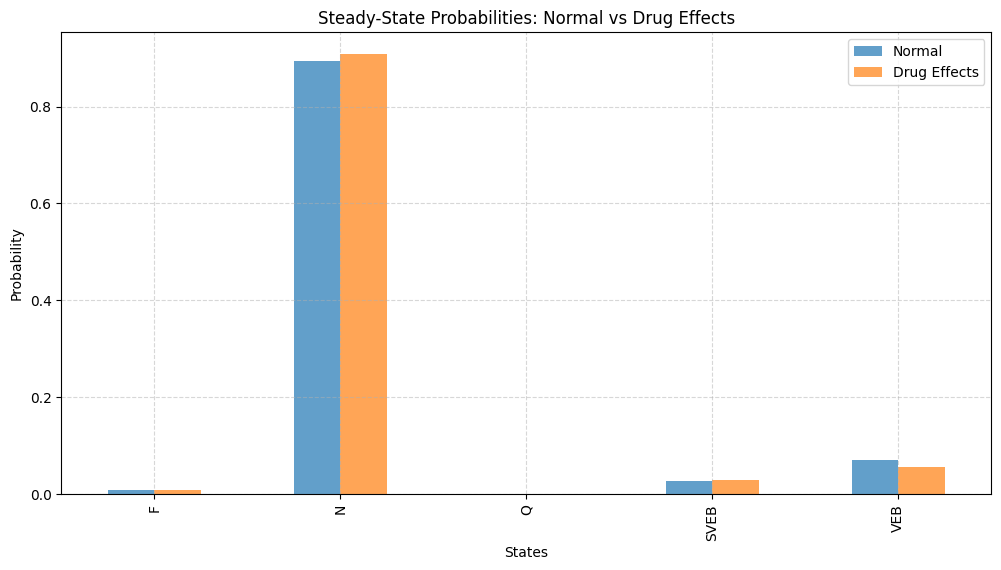

In [ ]:
#  Impact of Drug Effects
# Quantify how drug effects alter the steady-state or transient probabilities of critical states like VEB (ventricular beats).

# Function to compute steady-state probabilities
def compute_steady_state(matrix):
    matrix_np = matrix.to_numpy()
    num_states = matrix_np.shape[0]

    # Solve (P - I)x = 0 (steady-state equation)
    A = matrix_np.T - np.eye(num_states)
    A = np.vstack([A, np.ones(num_states)])  # Add normalization constraint
    b = np.zeros(num_states)
    b = np.append(b, 1)  # Ensure probabilities sum to 1

    steady_state = np.linalg.lstsq(A, b, rcond=None)[0]  # Solve linear system
    return pd.Series(steady_state, index=matrix.index)

# Compute steady-state probabilities
steady_state_normal = compute_steady_state(transition_matrix)
steady_state_drug = compute_steady_state(modified_transition_matrix)

# Compare steady-state probabilities for 'VEB'
print("Steady-State Probability of VEB (Normal):", steady_state_normal.get('VEB', 0))
print("Steady-State Probability of VEB (Drug Effects):", steady_state_drug.get('VEB', 0))

# Visualize steady-state probabilities
steady_state_comparison = pd.DataFrame({'Normal': steady_state_normal, 'Drug Effects': steady_state_drug}).fillna(0)
steady_state_comparison.plot(kind='bar', figsize=(12, 6), alpha=0.7)
plt.title("Steady-State Probabilities: Normal vs Drug Effects")
plt.xlabel("States")
plt.ylabel("Probability")
plt.grid(alpha=0.5, linestyle='--')
plt.legend()
plt.show()


Yes, the data from the **MIT-BIH Arrhythmia Database** is being used to calculate the **transition matrix**. Here's how this is being done and how it can help simulate drug effects:

---

### **1. Using the Data to Calculate the Transition Matrix**
The QRS morphology columns (`0_qrs_morph0` to `0_qrs_morph4`) in the dataset represent specific characteristics of the QRS complex (e.g., depolarization patterns). These columns are used to:
1. **Generate Morphology States:**
   - Each row in the dataset is mapped to a binary state string (e.g., `00000`, `11111`), representing a specific QRS morphology pattern.
2. **Transition Matrix:**
   - The transition matrix is calculated by analyzing the sequence of these morphology states, determining the probabilities of moving from one state to another.

#### Steps:
- **Thresholds:** Determine thresholds (mean values of each column) to discretize the continuous morphology data into binary values (e.g., `1` if above threshold, `0` otherwise).
- **Sequence Analysis:** Count the transitions between successive morphology states in the dataset.
- **Normalization:** Convert these counts into probabilities for each possible transition.

This results in a Markov transition matrix, which captures the dynamic progression of QRS morphology states.

---

### **2. How the Data Can Help Simulate Drug Effects**
The dataset can inform and simulate drug effects in the following ways:

#### **a. Identifying Baseline Behavior**
- The baseline transition matrix represents the natural progression of QRS states without intervention.
- It highlights typical patterns (e.g., persistence of abnormal states or recovery trends).

#### **b. Modeling Drug-Induced Changes**
Drugs often have measurable effects on QRS morphology, such as:
- Prolonging the QRS duration (e.g., sodium channel blockers).
- Stabilizing conduction to promote recovery to "normal" morphology.
  
By modifying specific transitions in the matrix, you can simulate these drug effects:
- **Increase Recovery Transitions:** Increase the probability of transitioning to "00000" or other normal states.
- **Reduce Pathological Persistence:** Decrease the likelihood of staying in abnormal states (e.g., `11111`).
- **Enhance Intermediate States:** Facilitate transitions from abnormal states to intermediate or near-normal states.

#### **c. Predicting the Outcome of Drug Effects**
Simulating the modified Markov process helps predict:
- **Likelihood of Recovery:** How often the system transitions to and stays in normal states.
- **Impact on Pathological States:** Reduction in time spent in abnormal or pathological states.
- **Dynamic Changes Over Time:** How quickly the drug stabilizes the morphology dynamics.

#### **d. Validating with Clinical or Experimental Data**
The dataset can be segmented into pre- and post-drug administration periods (if available). By comparing the predicted and actual transition matrices, you can validate and refine the drug-effect simulation.

---

### **Implementation Example**
Here’s how you can extend the process to simulate drug effects:

1. **Baseline Matrix:**
   Calculate the transition matrix from the dataset (already done in your code).

2. **Drug-Effect Modifications:**
   Apply known drug effects to modify the matrix.

3. **Simulate and Compare:**
   Simulate sequences using both the baseline and modified matrices. Compare:
   - Proportion of time in normal vs. pathological states.
   - Time to recovery.

4. **Visualization:**
   Plot Markov graphs and overlapping simulations to visualize how the drug changes the dynamics.



Transition Matrix:
          00000     00001     00010     00011     00100     00101     00110  \
00000  0.441202  0.146876  0.006962  0.018026  0.004292  0.000000  0.015069   
00001  0.145678  0.314348  0.017745  0.070406  0.000763  0.000095  0.055238   
00010  0.055651  0.088353  0.430293  0.069994  0.004016  0.000000  0.047619   
00011  0.059201  0.170772  0.022356  0.263093  0.000414  0.000207  0.041192   
00100  0.193277  0.142857  0.058824  0.025210  0.025210  0.000000  0.025210   
00101  0.000000  0.500000  0.000000  0.000000  0.000000  0.000000  0.000000   
00110  0.089391  0.256885  0.027088  0.088036  0.001354  0.000000  0.167043   
00111  0.037500  0.223438  0.007812  0.190625  0.003125  0.000000  0.112500   
01000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
01001  0.038462  0.269231  0.038462  0.000000  0.000000  0.000000  0.000000   
01010  0.000000  0.095238  0.071429  0.023810  0.000000  0.000000  0.000000   
01011  0.038462  0.230769  0.0384

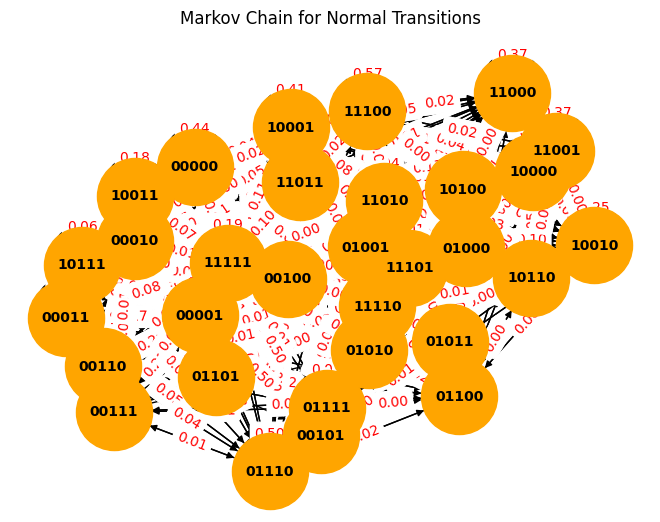

Simulated Sequence of Morphology States:
['00000', '00001', '01111', '00001', '11110', '10011', '11111', '10010', '11110', '11110', '10001', '10001', '11001', '11001', '11110', '11001', '11011', '10011', '00001', '00001', '01110']


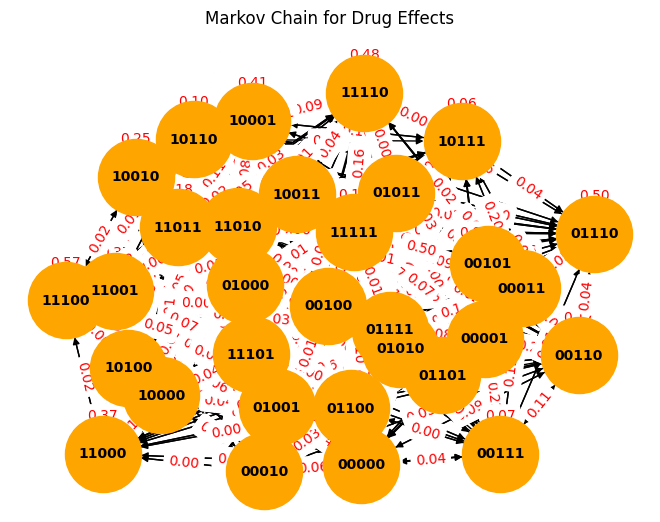

Simulated Sequence of Morphology States with Drug Effects:
['00000', '00001', '10001', '10001', '10001', '10000', '10010', '11110', '10001', '11110', '10011', '10001', '10001', '11111', '11100', '00111', '01110', '01110', '00110', '01110', '11110']


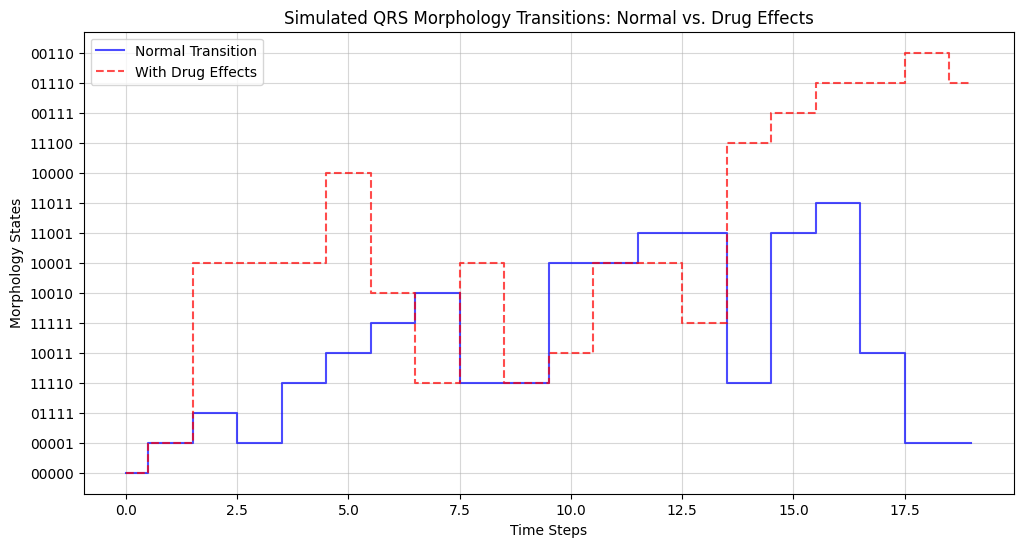

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/cardiac_arrythmia_modelling_simulation/MIT-BIH Arrhythmia Database.csv')

# Extract QRS morphology columns (e.g., '0_qrs_morph0' to '0_qrs_morph4')
qrs_columns = ['0_qrs_morph0', '0_qrs_morph1', '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4']

# Reduce dimensionality by creating a composite morphology pattern identifier
def create_morphology_states(row, thresholds):
    return ''.join(['1' if value > threshold else '0' for value, threshold in zip(row, thresholds)])

# Calculate thresholds (mean values of each QRS column)
thresholds = data[qrs_columns].mean().values

# Create a new column with the morphology state
data['qrs_state'] = data[qrs_columns].apply(lambda row: create_morphology_states(row, thresholds), axis=1)

# Create a Markov transition matrix
def calculate_transition_matrix(sequence):
    transitions = Counter((sequence[i], sequence[i+1]) for i in range(len(sequence) - 1))
    states = sorted(sequence.unique())
    matrix = pd.DataFrame(0, index=states, columns=states, dtype=float)

    for (from_state, to_state), count in transitions.items():
        matrix.loc[from_state, to_state] = count

    # Normalize rows to get probabilities
    matrix = matrix.div(matrix.sum(axis=1), axis=0).fillna(0)
    return matrix

transition_matrix = calculate_transition_matrix(data['qrs_state'])

# Display the transition matrix
print("Transition Matrix:")
print(transition_matrix)

# Visualize the Markov chain
def plot_markov_chain(matrix, title="Markov Chain"):
    graph = nx.DiGraph()
    for from_state in matrix.index:
        for to_state in matrix.columns:
            prob = matrix.loc[from_state, to_state]
            if prob > 0:
                graph.add_edge(from_state, to_state, weight=prob, label=f"{prob:.2f}")

    pos = nx.spring_layout(graph)
    edge_labels = nx.get_edge_attributes(graph, 'label')
    nx.draw(graph, pos, with_labels=True, node_size=3000, node_color='orange', font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red')
    plt.title(title)
    plt.show()

plot_markov_chain(transition_matrix, "Markov Chain for Normal Transitions")

# Simulate morphology transitions
def simulate_markov_chain(matrix, start_state, steps):
    current_state = start_state
    states = [current_state]

    for _ in range(steps):
        probabilities = matrix.loc[current_state]
        next_state = np.random.choice(probabilities.index, p=probabilities.values)
        states.append(next_state)
        current_state = next_state

    return states

# Start with a specific morphology state and simulate 20 transitions
start_state = '00000'
simulated_states = simulate_markov_chain(transition_matrix, start_state, 20)
print("Simulated Sequence of Morphology States:")
print(simulated_states)

# Apply drug effects to the transition matrix
def apply_drug_effects(matrix, drug_effects):
    modified_matrix = matrix.copy()
    for (from_state, to_state), effect in drug_effects.items():
        if from_state in matrix.index and to_state in matrix.columns:
            modified_matrix.loc[from_state, to_state] *= effect

    # Normalize rows to ensure probabilities sum to 1
    modified_matrix = modified_matrix.div(modified_matrix.sum(axis=1), axis=0).fillna(0)
    return modified_matrix

# Define drug effects
drug_effects = {
    ('00000', '00001'): 1.5,  # Increase recovery transitions
    ('11111', '00000'): 2.0,  # Strong effect to recover to '00000'
    ('11111', '11111'): 0.5   # Decrease persistence of pathological state
}

# Apply drug effects to the transition matrix
modified_transition_matrix = apply_drug_effects(transition_matrix, drug_effects)

# Visualize the modified Markov chain
plot_markov_chain(modified_transition_matrix, "Markov Chain for Drug Effects")

# Simulate morphology transitions with drug effects
simulated_states_drug = simulate_markov_chain(modified_transition_matrix, start_state, 20)
print("Simulated Sequence of Morphology States with Drug Effects:")
print(simulated_states_drug)

# Visualize the original vs drug-effect transitions
time_steps = list(range(20))
plt.figure(figsize=(12, 6))
plt.step(time_steps, simulated_states[:20], where='mid', label="Normal Transition", color='blue', alpha=0.7)
plt.step(time_steps, simulated_states_drug[:20], where='mid', label="With Drug Effects", color='red', linestyle='--', alpha=0.7)

plt.xlabel("Time Steps")
plt.ylabel("Morphology States")
plt.title("Simulated QRS Morphology Transitions: Normal vs. Drug Effects")
plt.grid(alpha=0.5)
plt.legend()
plt.show()


In [ ]:
def monte_carlo_simulation(matrix, start_state, steps, iterations):
    state_counts = {state: 0 for state in matrix.index}
    for _ in range(iterations):
        sequence = simulate_markov_chain(matrix, start_state, steps)
        for state in sequence:
            state_counts[state] += 1
    # Normalize to get probabilities
    total_counts = sum(state_counts.values())
    state_probabilities = {state: count / total_counts for state, count in state_counts.items()}
    return state_probabilities

mc_normal = monte_carlo_simulation(train_transition_matrix, start_state, 100, 1000)
mc_drug = monte_carlo_simulation(modified_train_transition_matrix, start_state, 100, 1000)

print("Monte Carlo Probabilities (Normal):", mc_normal)
print("Monte Carlo Probabilities (Drug Effects):", mc_drug)


Monte Carlo Probabilities (Normal): {'00000': 0.11407920792079208, '00001': 0.10282178217821782, '00010': 0.016623762376237625, '00011': 0.04801980198019802, '00100': 0.0011089108910891088, '00101': 9.900990099009901e-06, '00110': 0.022732673267326732, '00111': 0.006247524752475248, '01000': 6.93069306930693e-05, '01001': 0.00022772277227722774, '01010': 0.00041584158415841583, '01011': 0.0002871287128712871, '01100': 0.007128712871287129, '01101': 2.9702970297029702e-05, '01110': 0.07986138613861386, '01111': 0.007277227722772278, '10000': 0.046, '10001': 0.1261089108910891, '10010': 0.01100990099009901, '10011': 0.036376237623762374, '10100': 0.0008910891089108911, '10110': 0.005346534653465347, '10111': 0.003138613861386139, '11000': 0.022277227722772276, '11001': 0.0753069306930693, '11010': 0.004128712871287129, '11011': 0.031376237623762376, '11100': 0.04204950495049505, '11101': 0.0006435643564356436, '11110': 0.14439603960396039, '11111': 0.04400990099009901}
Monte Carlo Probab

Here’s the full block of code that integrates beat types, arrhythmia categories, and drug effects into a cohesive simulation and visualization framework:

In [ ]:
data.columns

Index(['record', 'type', '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak',
       '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval', '0_pq_interval',
       '0_qt_interval', '0_st_interval', '0_qrs_morph0', '0_qrs_morph1',
       '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4', '1_pre-RR', '1_post-RR',
       '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak', '1_qrs_interval',
       '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0',
       '1_qrs_morph1', '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4'],
      dtype='object')

Transition Matrix:
            Arrhythmia    Normal     Other   Unknown
Arrhythmia    0.007472  0.610212  0.000000  0.382316
Normal        0.008659  0.915699  0.000122  0.075520
Other         0.000000  0.800000  0.200000  0.000000
Unknown       0.001737  0.724561  0.000102  0.273600
Transition Matrix:
            Arrhythmia    Normal     Other   Unknown
Arrhythmia    0.007472  0.610212  0.000000  0.382316
Normal        0.008659  0.915699  0.000122  0.075520
Other         0.000000  0.800000  0.200000  0.000000
Unknown       0.001737  0.724561  0.000102  0.273600


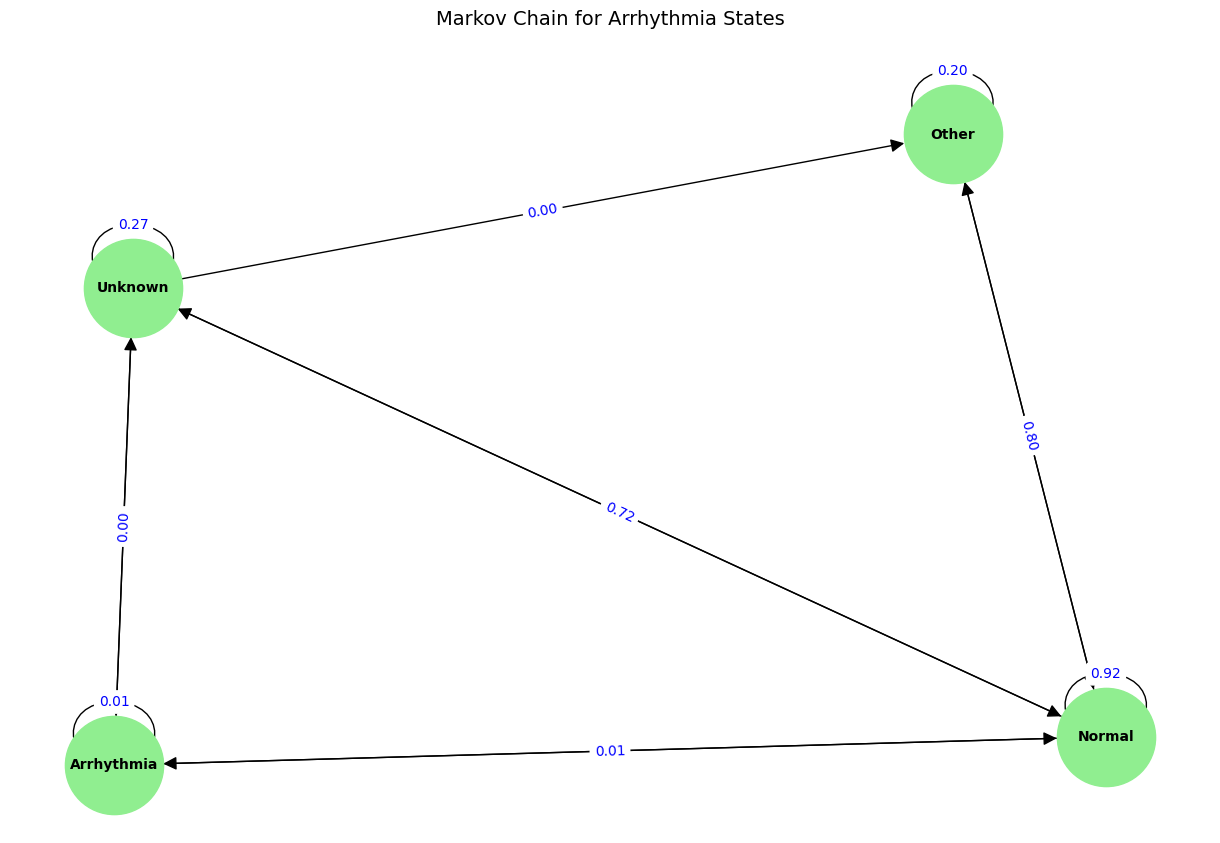

Simulated Sequence of Arrhythmia States:
['Arrhythmia', 'Unknown', 'Normal', 'Normal', 'Normal', 'Normal', 'Arrhythmia', 'Normal', 'Unknown', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Arrhythmia', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Unknown', 'Unknown', 'Normal', 'Normal', 'Normal', 'Normal', 'Unknown', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Unknown', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Norma

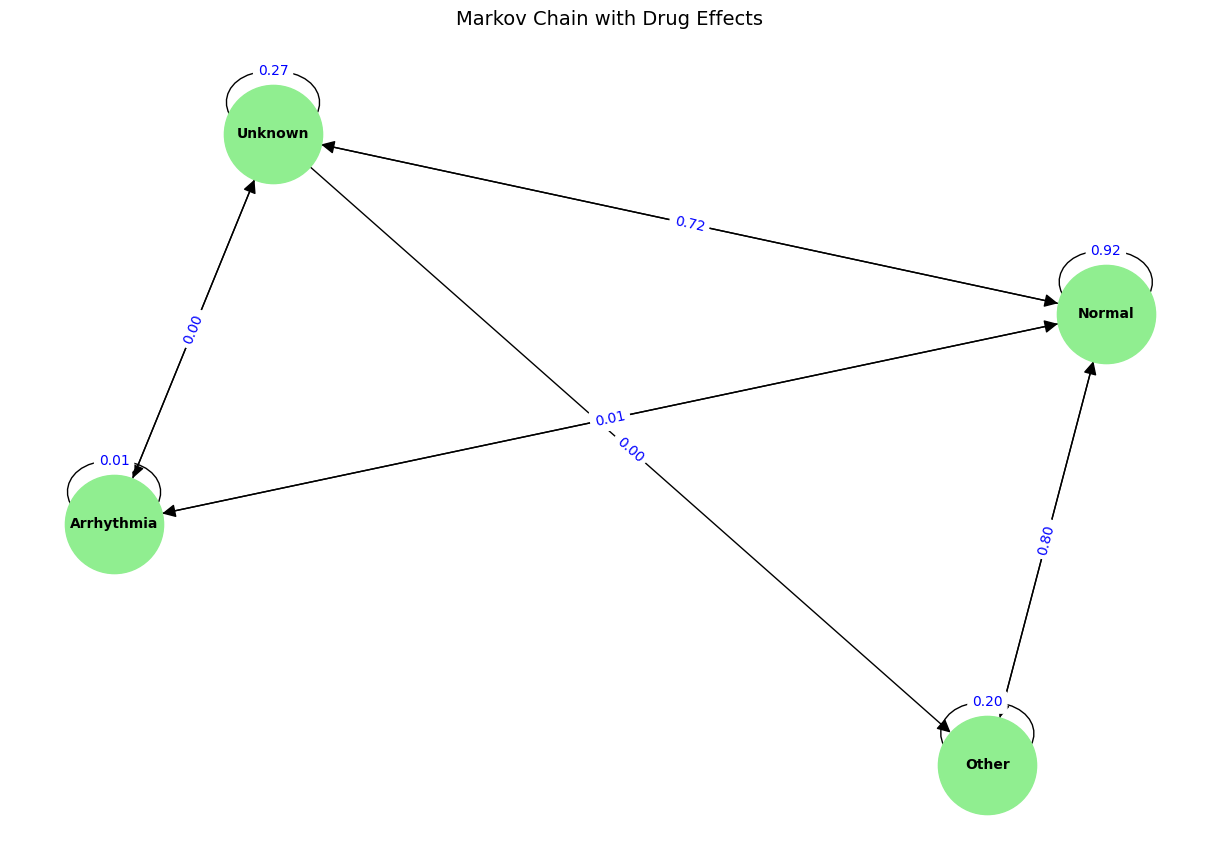

Simulated Sequence of Arrhythmia States with Drug Effects:
['Arrhythmia', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Unknown', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Arrhythmia', 'Normal', 'Normal', 'Normal', 'Unknown', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Unknown', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',

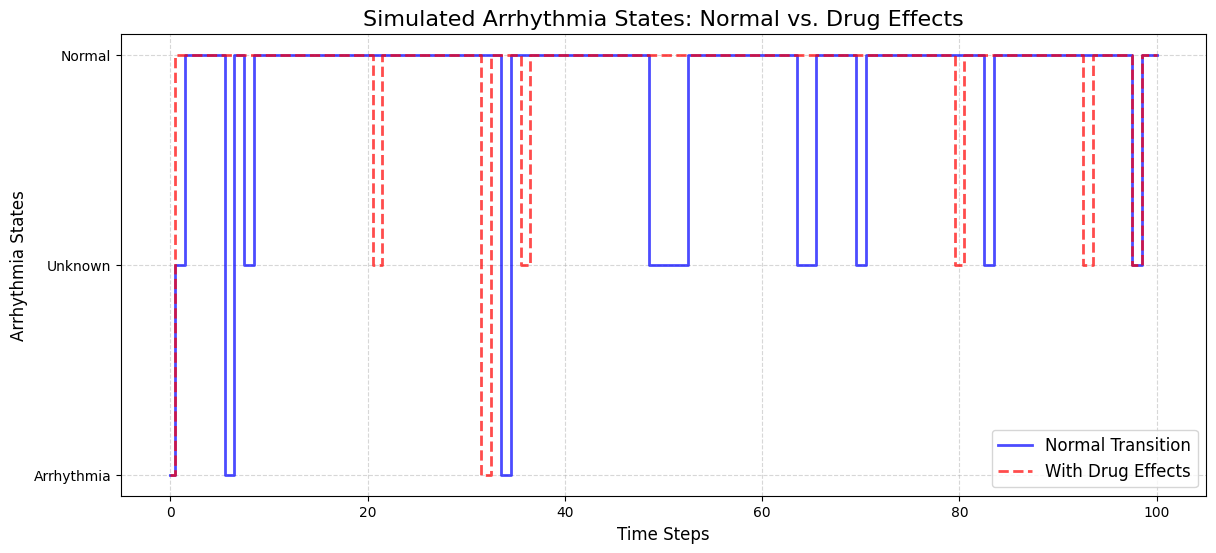

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/cardiac_arrythmia_modelling_simulation/MIT-BIH Arrhythmia Database.csv')

# Replace NaN values in 'type' column with 'Unknown' and ensure all values are strings
data['type'] = data['type'].fillna('Unknown').astype(str)

# Map beat types to broader arrhythmia categories
beat_to_category = {
    'N': 'Normal',
    'V': 'Arrhythmia',
    'F': 'Arrhythmia',
    'S': 'Arrhythmia',
    'Q': 'Other'
}
data['arrhythmia_state'] = data['type'].map(beat_to_category)

# Create a Markov transition matrix
def calculate_transition_matrix(sequence):
    # Ensure all values in the sequence are strings
    sequence = sequence.fillna('Unknown').astype(str).tolist()

    # Count transitions between states
    transitions = Counter((sequence[i], sequence[i+1]) for i in range(len(sequence) - 1))

    # Create sorted list of unique states
    states = sorted(set(sequence))

    # Initialize transition matrix
    matrix = pd.DataFrame(0, index=states, columns=states, dtype=float)

    for (from_state, to_state), count in transitions.items():
        matrix.loc[from_state, to_state] = count

    # Normalize rows to get probabilities
    matrix = matrix.div(matrix.sum(axis=1), axis=0).fillna(0)
    return matrix

# Ensure arrhythmia_state column exists and contains no NaN values
data['arrhythmia_state'] = data['arrhythmia_state'].fillna('Unknown').astype(str)

# Calculate the transition matrix for arrhythmia states
transition_matrix = calculate_transition_matrix(data['arrhythmia_state'])

# Display the transition matrix
print("Transition Matrix:")
print(transition_matrix)


# Display the transition matrix
print("Transition Matrix:")
print(transition_matrix)

# Visualize the Markov chain
def plot_markov_chain(matrix, title="Markov Chain"):
    graph = nx.DiGraph()
    for from_state in matrix.index:
        for to_state in matrix.columns:
            prob = matrix.loc[from_state, to_state]
            if prob > 0:
                graph.add_edge(from_state, to_state, weight=prob, label=f"{prob:.2f}")

    pos = nx.spring_layout(graph)
    edge_labels = nx.get_edge_attributes(graph, 'label')
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, node_size=5000, node_color='lightgreen', font_size=10, font_weight='bold', arrowsize=20)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='blue')
    plt.title(title, fontsize=14)
    plt.show()

# Plot the Markov chain for arrhythmia states
plot_markov_chain(transition_matrix, "Markov Chain for Arrhythmia States")

# Simulate Markov Chain transitions
def simulate_markov_chain(matrix, start_state, steps):
    current_state = start_state
    states = [current_state]

    for _ in range(steps):
        probabilities = matrix.loc[current_state]
        if probabilities.sum() == 0:  # Safeguard: No transitions from this state
            break
        next_state = np.random.choice(probabilities.index, p=probabilities.values)
        states.append(next_state)
        current_state = next_state

    return states

# Simulate transitions starting from "Arrhythmia"
start_state = 'Arrhythmia'
simulated_sequence = simulate_markov_chain(transition_matrix, start_state, 100)
print("Simulated Sequence of Arrhythmia States:")
print(simulated_sequence)

# Apply drug effects to the transition matrix
def apply_drug_effects(matrix, drug_effects):
    modified_matrix = matrix.copy()
    for (from_state, to_state), effect in drug_effects.items():
        if from_state in matrix.index and to_state in matrix.columns:
            modified_matrix.loc[from_state, to_state] *= effect

    # Normalize rows to ensure probabilities sum to 1
    modified_matrix = modified_matrix.div(modified_matrix.sum(axis=1), axis=0).fillna(0)
    return modified_matrix

# Define drug effects
drug_effects = {
    ('Normal', 'Arrhythmia'): 0.8,  # Reduce transitions into arrhythmia
    ('Arrhythmia', 'Normal'): 1.5  # Increase recovery to normal
}

# Apply drug effects
modified_transition_matrix = apply_drug_effects(transition_matrix, drug_effects)

# Plot the modified Markov chain for drug effects
plot_markov_chain(modified_transition_matrix, "Markov Chain with Drug Effects")

# Simulate transitions with drug effects
simulated_sequence_drug = simulate_markov_chain(modified_transition_matrix, start_state, 100)
print("Simulated Sequence of Arrhythmia States with Drug Effects:")
print(simulated_sequence_drug)

# Visualize overlay of normal and drug-effect simulations
def plot_simulation_overlay(normal_sequence, drug_sequence, time_steps, title="Simulated Arrhythmia States: Normal vs. Drug Effects"):
    plt.figure(figsize=(14, 6))

    # Plot the normal sequence
    plt.step(time_steps, normal_sequence, where='mid', label="Normal Transition", color='blue', alpha=0.7, linewidth=2)

    # Plot the drug-effect sequence
    plt.step(time_steps, drug_sequence, where='mid', label="With Drug Effects", color='red', linestyle='--', alpha=0.7, linewidth=2)

    # Add plot details
    plt.xlabel("Time Steps", fontsize=12)
    plt.ylabel("Arrhythmia States", fontsize=12)
    plt.title(title, fontsize=16)
    plt.grid(alpha=0.5, linestyle='--')
    plt.legend(fontsize=12)
    plt.show()

# Define time steps
time_steps = list(range(len(simulated_sequence)))

# Plot the overlay of simulated sequences
plot_simulation_overlay(simulated_sequence, simulated_sequence_drug, time_steps)


Validation